No handles with labels found to put in legend.


There are 90 samples in the training set and 60 sampels in the test set
The accuracy of the model is:
--------------------------------
0.7333333333333333
Misclassified samples: 16


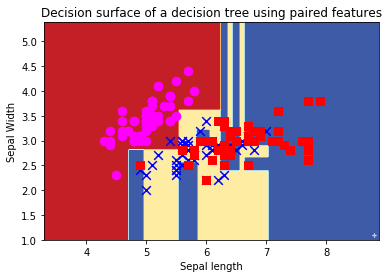

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree


iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, 
                                                    random_state = 5)
print('There are {} samples in the training set and {} sampels in the test set'
      .format(X_train.shape[0], Y_test.shape[0]))

############# parameters #######
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z, cmap = plt.cm.RdYlBu)
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
#training points
markers = ('o', 'x','s')
colors = ('magenta', 'blue', 'red')
cmap = ListedColormap(colors[:len(np.unique(Y_test))])
for idx, cl in enumerate(np.unique(Y)): 
    plt.scatter(x=X[Y==cl, 0], y=X[Y==cl, 1], c=cmap(idx),  
                marker = markers[idx], s =75 )
    
plt.title("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.savefig('decision_trees_3.eps', format='eps', dpi=1000)
    

#########################
# Visualize data
print("The accuracy of the model is:")
print("--------------------------------")
print(metrics.accuracy_score(Y_test, Y_pred))
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())

There are 90 samples in the training set and 60 sampels in the test set
The accuracy of the model is:
--------------------------------
0.9666666666666667
Misclassified samples: 2


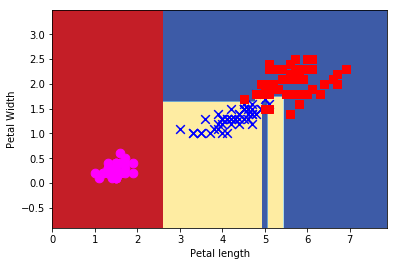

In [4]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, 
                                                    random_state = 5)
print('There are {} samples in the training set and {} sampels in the test set'
      .format(X_train.shape[0], Y_test.shape[0]))
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

clf = DecisionTreeClassifier().fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z, cmap = plt.cm.RdYlBu)
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
#training points
markers = ('o', 'x','s')
colors = ('magenta', 'blue', 'red')
cmap = ListedColormap(colors[:len(np.unique(Y_test))])
for idx, cl in enumerate(np.unique(Y)): 
    plt.scatter(x=X[Y==cl, 0], y=X[Y==cl, 1], c=cmap(idx), 
                marker = markers[idx], label=cl, s =75 )
    
plt.savefig('decision_trees_4.eps', format='eps', dpi=1000)

print("The accuracy of the model is:")
print("--------------------------------")
print(metrics.accuracy_score(Y_test, Y_pred))
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())